## Discretizing 2D Poisson's Equation with Finite Difference

$$ -\left(\frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}\right)= f(x,y)$$ 
Using the finite differences method to discretize the 2D Poisson's Equation on an $mxn$ grid.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)

From the finite differences method
$$\frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2} \approx \frac{u_{(i+1),j}-2u_{i,j} +u_{(i-1),j}}{\Delta x^2} + \frac{u_{i,(j+1)}-2u_{i,j} +u_{i,(j-1)}}{\Delta y^2}.$$
Therefore
$$ -\left(\frac{u_{(i+1),j}-2u_{i,j} +u_{(i-1),j}}{\Delta x^2} + \frac{u_{i,(j+1)}-2u_{i,j} +u_{i,(j-1)}}{\Delta y^2}\right) =f(x,y).$$ 

Assuming a uniform spatial discretization , $\Delta x^2 = \Delta y^2$. Thus
$$ -\frac{1}{\Delta x^2} \left(u_{(i+1),j}+u_{(i-1),j}-4u_{i,j} +u_{i,(j+1)} +u_{i,(j-1)}\right) =f_{i,j}.$$ 
<br>
As a result, the following linear system is produced
$$Au = f.$$

In [3]:
# N = 3
# M = 3

In [4]:
matrix = np.zeros((16,16), dtype=float, order='C') 

In [5]:
delta_y = 1
delta_x = 1
f = 1

In [6]:
matrix

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [7]:
b = np.ones(16)*f

In [8]:
#Boundary Conditions

# Top edge
for i in range(4):
    matrix[i,i] = 1
    b[i] = 0
    
# Bottom edge
for i in range(12,16):
    matrix[i,i] = 1
    b[i] = 0
    
#left side edge
matrix[4,4] = 1
matrix[8,8] = 1

# right side edge
matrix[7,7] = 1
matrix[11,11] = 1

In [9]:
# non boundary conditions
matrix[5,1] = -1
matrix[5,4] = -1
matrix[5,5] = 4
matrix[5,6] = -1
matrix[5,9] = -1

matrix[6,2] = -1
matrix[6,5] = -1
matrix[6,6] = 4
matrix[6,7] = -1
matrix[6,10] = -1

matrix[9,5] = -1
matrix[9,8] = -1
matrix[9,9] = 4
matrix[9,10] = -1
matrix[9,13] = -1

matrix[10,6] = -1
matrix[10,9] = -1
matrix[10,10] = 4
matrix[10,11] = -1
matrix[10,14] = -1

In [10]:
matrix

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0., -1.,  0.,  0., -1.,  4., -1.,  0.,  0., -1.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0., -1.,  4., -1.,  0.,  0., -1.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  4., -1.,  0.,  0.,
         -1.,  0.,  0.],
        [ 

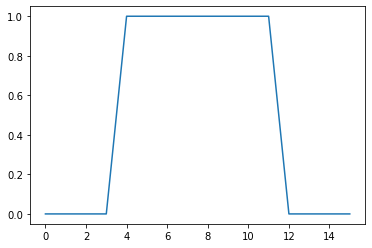

In [11]:
plt.plot(np.linalg.solve(matrix, b))